# Exploring the <code>chess</code> Library

In [ ]:
import chess

In [ ]:
board = chess.Board()

In [ ]:
board.san(chess.Move(chess.E2, chess.E4))

In [ ]:
print(board)

In [ ]:
board.push_san("Nf3")

In [ ]:
print(board)
board

In [ ]:
board.move_stack

In [ ]:
__repr__ = board.__repr__()

In [ ]:
display(board)

In [ ]:
board.push(chess.Move(chess.E2, chess.E1))

In [ ]:
display(board)

In [ ]:
print(board)

In [ ]:
board = chess.Board()
move = chess.Move.from_uci("e2e1")
move = move.uci()
board.push_uci(move)

In [ ]:
board.fen()

In [ ]:
fen = '4r1rk/5K1b/7R/R7/8/8/8/8 w - - 0 1'
chess.Board(fen)

In [ ]:
fen = '4r1rk/5K1b/7R/R7/8/8/8/8 w - - 0 1'
board = chess.Board(fen)
board.piece_map()
for square in board.piece_map():
    print(square, board.piece_map()[square])

In [ ]:
board = chess.Board(fen)

def alpha_beta_pruning(curr, alpha, beta, depth, max_player=True):
    if curr.is_checkmate():
        if curr.turn == max_player:
            return (1000000, list())
        else:
            return (-1000000, list())
    if curr.is_stalemate():
        return 0, []
    if depth == 0:
        map = curr.piece_map()
        ref = {'p': 1, 'n': 3, 'b': 3, 'r': 5, 'q': 9, 'k': 100}
        count = dict()
        pieces = ['k', 'q', 'r', 'b', 'n', 'p']
        for piece in pieces:
            count[piece] = 0
            count[piece.upper()] = 0
        score = 0
        for key in map:
            count[str(map[key])] += 1
        for piece in pieces:
            score += (count[piece.upper()] - count[piece]) * ref[piece]
        return (score, list())
    # if curr.fen() == '4rr1k/7b/5K1R/R7/8/8/8/8 w - - 2 2':
    #     print('here')
    if max_player:
        max_eval = -1000000
        best_move = []
        for move in curr.legal_moves:
            new = curr.copy()
            new.push(move)
            eval, cmove = alpha_beta_pruning(new, alpha, beta, depth - 1, False)
            # print(new.fen(), eval, cmove, depth, alpha, beta)
            max_eval = max(max_eval, eval)
            if max_eval == eval:
                best_move = [move, ] + cmove 
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval, best_move
    else:
        min_eval = 1000000
        best_move = []
        for move in curr.legal_moves:
            new = curr.copy()
            new.push(move)
            eval, cmove = alpha_beta_pruning(new, alpha, beta, depth - 1, True)
            # print(new.fen(), eval, cmove, depth, alpha, beta)
            min_eval = min(min_eval, eval)
            if min_eval == eval:
                # print(cmove)
                best_move = [move, ] + cmove
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval, best_move

In [ ]:
board = chess.Board(fen)
result = alpha_beta_pruning(board, -1000000, 1000000, 3, True)
for move in result[1]:
    print(board.san(move), end=' ')
    board.push(move)

In [ ]:
import requests
url = 'https://wtharvey.com/m8n2a.html'
response = requests.get(url)

In [ ]:
response.text

In [ ]:
import re
puzzles = dict()
for line in response.text.split('\n'):
    if re.search(r'</a><br>.+<br>', line):
        line = line.split('<br>')
        if 'Black' in line[1]:
            line.pop(1)
        # print(line)
        puzzles[line[1]] = line[2].split('white>')[1].split('<')[0]

In [ ]:
# puzzles

In [ ]:
from tqdm import tqdm
from chess_minmax import alphabet
correct = 0
incorrect = 0
for puzzle in puzzles:
    board = chess.Board(puzzle)
    result = alphabet(board, 3)
    answer = ''
    for move in result[1]:
        answer += board.san(move) + ' '
        board.push(move)
    answer = answer.strip()
    if answer.strip() == puzzles[puzzle]:
        # print('Correct', answer)
        correct += 1
    else:
        try:
            if (answer.split(' ')[-1] == puzzles[puzzle].split(' ')[-1]) and (answer.split(' ')[0] == puzzles[puzzle].split(' ')[0]):
                # print('Correct', answer, puzzles[puzzle])
                correct += 1
            else:
                print('Incorrect', answer, puzzles[puzzle])
                incorrect += 1
        except:
            print('Incorrect', answer, puzzles[puzzle])
            incorrect += 1
print(correct, incorrect)

In [ ]:
from chess_minmax import alphabet
import chess
import chess.svg

# fen_list = [
#     "2r5/1b1p1p1k/p2Pp1p1/PpP1P1Pp/1P1K1P1P/3R4/8/8 w - - 0 1",
#     "8/5p1k/4pPpp/4P1KP/6P1/8/8/8 w - - 0 1",
#     "8/8/8/8/8/2K5/PP6/k7 w - - 0 1",
#     "8/8/8/8/8/2K5/PP6/1k6 w - - 0 1",
#     "8/8/8/8/8/2K5/PP6/2k5 w - - 0 1"
# ]

# fen = 'r5rk/5p1p/5R2/4B3/8/8/7P/7K w - - 0 1'
# result = alphabet(fen, 5)
# board = chess.Board(fen)
# for move in result[1]:
#     display(chess.svg.board(board, arrows=[chess.svg.Arrow(move.from_square, move.to_square)], size=400))
#     print(board.san(move), end=' ')
#     board.push(move)
# board

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('lichess_db_puzzle.csv')

In [ ]:
# filter data with mate in 2 in themes
mate_in_2 = data.loc[data['Themes'].str.contains('mateIn2')]

In [ ]:
data

In [ ]:
mate_in_2

In [ ]:
mate_in_3 = data.loc[data['Themes'].str.contains('mateIn3')]

In [ ]:
mate_in_2

In [ ]:
from tqdm import tqdm
correct = 0
incorrect = 0
for puzzle in tqdm(mate_in_2.iterrows()):
    fen = puzzle[1]['FEN']
    board = chess.Board(fen)
    result = alphabet(fen, 3)
    moves = ''
    for move in result[1]:
        # display(chess.svg.board(board, arrows=[chess.svg.Arrow(move.from_square, move.to_square)], size=400))
        moves += board.san(move) + ' '
        board.push(move)
    if board.is_checkmate():
        correct += 1
    else:
        incorrect += 1
#         print(fen, moves)
print(correct, incorrect)

In [ ]:
from tqdm import tqdm
import sys
correct = 0
incorrect = 0
temp_message = '0 0'
sys.stdout.write(temp_message)
sys.stdout.flush()
for puzzle in mate_in_2.iterrows():
    fen = puzzle[1]['FEN']
    board = chess.Board(fen)
    result = alphabet(fen, 3)
    moves = ''
    for move in result[1]:
        # display(chess.svg.board(board, arrows=[chess.svg.Arrow(move.from_square, move.to_square)], size=400))
        moves += board.san(move) + ' '
        board.push(move)
    if board.is_checkmate():
        correct += 1
    else:
        incorrect += 1
    sys.stdout.write('\r' + ' ' * len(temp_message) + '\r')
    temp_message = f'{correct} {incorrect}'
    sys.stdout.write(temp_message)
    sys.stdout.flush()
#         print(fen, moves)
print(correct, incorrect)

In [ ]:
from my_chess_engine import Engine

fen = list(puzzles.keys())[0]

In [ ]:
engine = Engine(fen)
fen

In [ ]:
display(engine.board)
print(engine.alphabet(3))
engine.board

In [ ]:
from my_chess_engine import Engine
fen = list(puzzles.keys())[0]
engine = Engine(fen)
print(engine.alphabet(3))

In [ ]:
engine.board

In [1]:
puzzles = {
 '4r1rk/5K1b/7R/R7/8/8/8/8 w - - 0 1': 'Rxh7+ Kxh7 Rh5#',
 '8/1r6/8/3R4/k7/p1K5/4r3/R7 w - - 0 1': 'Rxa3+ Kxa3 Ra5#',
 '6k1/8/6K1/8/8/3r4/4r3/5R1R w - - 0 1': 'Rh8+ Kxh8 Rf8#',
 '2rkr3/2ppp3/2n1n3/R2R4/8/8/3K4/8 w - - 0 1': 'Rxd7+ Kxd7 Rd5#',
 '4rkr1/1R1R4/4bK2/8/8/8/8/8 w - - 0 1': 'Rf7+ Bxf7 Rxf7#',
 '5K1k/6pp/7R/8/8/8/8/6R1 w - - 0 1': 'Rgg6 gxh6 Rg8#',
 '2k5/1q4b1/3K4/8/7R/8/7R/8 w - - 0 1': 'Rh8+ Bxh8 Rxh8#',
 '8/8/q5b1/7k/5Kp1/1R1R4/8/8 w - - 0 1': 'Rh3+ gxh3 Rxh3#',
 'k7/3b4/1K6/8/8/5q2/2R1R3/8 w - - 0 1': 'Re8+ Bxe8 Rc8#',
 '8/1R1R4/8/p7/k1K5/r5r1/8/8 w - - 0 1': 'Rb4+ axb4 Ra7#',
 'kr6/1p6/8/1p5R/6R1/8/1r6/5K2 w - - 0 1': 'Ra4+ bxa4 Ra5#',
 '6R1/8/8/7p/5K1k/r6r/8/6R1 w - - 0 1': 'R1g4+ hxg4 Rh8#',
 '4R3/8/5K2/7p/R5pk/5npr/8/8 w - - 0 1': 'Rxg4+ if hxg4 Rh8# or if Kxg4 Re4#',
 'kb6/p4q2/2K5/8/8/8/8/1R1R4 w - - 0 1': 'Rxb8+ Kxb8 Rd8#',
 '8/6p1/6rk/6np/R6R/6K1/8/8 w - - 0 1': 'Rxh5+ Kxh5 Rh4#',
 'kn1R4/ppp5/2q5/8/8/8/8/3RK3 w - - 0 1': 'Rxb8+ Kxb8 Rd8#',
 '1kb4R/1npp4/8/8/8/8/8/R5K1 w - - 0 1': 'Rxc8+ Kxc8 Ra8#',
 '8/8/1b6/kr6/pp6/1n6/7R/R3K3 w Q - 0 1': 'Rxa4+ Kxa4 Ra2#',
 '5K1k/7p/8/2p5/2rp4/8/p7/1B4B1 w - - 0 1': 'Bh2 axb8/Q Be5#',
 'k7/p7/B2K4/8/8/8/3p2p1/4B3 w - - 0 1': 'Kc7 dxe1/Q Bb7#',
 '8/5n2/8/6B1/8/4K3/7p/5B1k w - - 0 1': 'Kf2 Nxg5 Bg2#',
 '8/5p2/7p/5Kpk/4BB1p/7r/8/8 w - - 0 1': 'Bd5 gxf4 Bxf7#',
 '8/6N1/8/pp6/kp6/pp5K/2N5/8 w - - 0 1': 'Ne6 bxc2 Nc5#',
 '8/8/8/7N/8/8/1p5p/N3K2k w - - 0 1': 'Kf2 bxa1/Q Ng3#',
 '4K3/8/8/4N1pr/4b1pk/4N1nr/8/8 w - - 0 1': 'Ng2+ Bxg2 Ng6#',
 'k7/ppK5/2N5/3N4/8/8/7p/8 w - - 0 1': 'Kc8 bxc6 Nc7#',
 '7k/4K1pp/6pn/6N1/6N1/8/8/8 w - - 0 1': 'Kf8 Nxg4 Nf7#',
 '8/8/7p/5K1k/7p/8/2pn1N2/3N4 w - - 0 1': 'Nh3 cxd1/Q Nf4#',
 '7k/6pp/5P1P/8/8/8/1p3K2/8 w - - 0 1': 'f7 w/f8/Q#',
 '7k/5P2/4n1PK/8/8/8/8/8 w - - 0 1': 'g7+ Nxg7 f8/Q# (or f8/R#) ',
 'k7/pn6/p1Pp4/4P3/8/8/8/6K1 w - - 0 1': 'c7 if dxe5 c8/Q# (or c8/R#)',
 '8/4PKPk/5n1p/4b3/8/8/p7/q7 w - - 0 1': 'e8/Q+ Nxe8 g8/Q#',
 'r1k5/P7/2K1P3/8/8/8/8/8 w - - 0 1': 'e7 Rxa7 e8/Q# (or e8/R#)',
 '3k1r2/1P3P2/8/3K4/8/8/8/8 w - - 0 1': 'Kd6 Rxf7 b8/Q# (or b8/R#)',
 '8/8/2P5/8/4p2p/p4Ppk/6p1/6K1 w - - 0 1': 'c7 exf3 c8/Q# (or c8/B#)',
 '2b5/7P/4Pp2/7p/5K1k/7p/p6n/8 w - - 0 1': 'h8/N a1/Q Ng6#',
 '1k1B4/8/1K6/1n6/q7/8/8/3R4 w - - 0 1': 'Bc7+ Nxc7 Rd8#',
 '7k/B7/6K1/8/8/2b5/7r/R7 w - - 0 1': 'Bd4+ Bxd4 Ra8+',
 '6Bk/R4K2/8/8/8/8/8/8 w - - 0 1': 'Kg6 Kxg8 Ra8#',
 'kb6/6n1/K7/5p2/4p3/8/8/4R2B w - - 0 1': 'Rxe4 if fxe4 Bxe4# or if f4 Rxf4#',
 '5Knk/7b/R7/8/7B/8/8/8 w - - 0 1': 'Rh6 Nxh6 Bf6#',
 '8/8/8/6nr/4nB1k/8/6K1/5R2 w - - 0 1': 'Bg3+ if Nxg3 Rf4# or if Kg4 Rf4#',
 '7k/5ppr/K5p1/8/8/8/2B5/2R5 w - - 0 1': 'Bxg6 fxg6 Rc8#',
 '7k/7p/5K1b/8/6R1/8/1B6/1q6 w - - 0 1': 'Kf7+ if Qxb2 Rg8# or if Bb7 Bxg7#',
 '6B1/p1K5/k7/pp6/8/8/8/R7 w - - 0 1': 'Ra4 bxa4 Bc4#',
 '8/8/pp6/kb2B3/4n3/K1R5/8/8 w - - 0 1': 'Rc5 if Nxc5 Bc3# or if bxc5 Bc7#',
 'k7/pbK5/8/1B2n3/8/8/6p1/1R6 w - - 0 1': 'Ba6 if g1/Q Bxb7# or if Bxa6 Rb8#',
 '8/8/7p/5K1k/6pp/1R6/B4n1r/8 w - - 0 1': 'Rh3 w/Bf7#',
 'r7/kp6/pR1Q4/5q2/8/8/8/3K4 w - - 0 1': 'Rxa6+ bxa6 Qc7#',
 '4Q3/kr6/pp6/8/8/8/6q1/R2K4 w - - 0 1': 'Rxa6+ Kxa6 Qa4#',
 '6rk/6n1/1R1Q4/7r/8/8/8/3K4 w - - 0 1': 'Qh6+ Rxh6 Rxh6#',
 '1k4r1/ppp5/8/8/2q5/8/5Q2/3K1R2 w - - 0 1': 'Qf8+ Rxf8 Rxf8#',
 '3R4/2q5/8/rpn5/kp5Q/2n5/1K6/8 w - - 0 1': 'Qxb4+ Kxb4 Rd4#',
 '5Q2/pp6/kp1R4/8/K7/8/4q3/8 w - - 0 1': 'Rxb6+ if Kxb6 Qd6# or if axb6 Qa8#',
 '1q1r3k/7p/7K/8/4R3/2p5/8/1Q6 w - - 0 1': 'Re8+ Rxe8 Qxh7#',
 'kr6/1p6/p5R1/8/1q6/8/Q7/2K5 w - - 0 1': 'Rxa6+ bxa6 Qxa6#',
 'k7/p2bR3/Q7/8/3q4/8/8/2K5 w - - 0 1': 'Re8+ Bxe8 Qc8#',
 'k3r3/pR6/K7/2b5/8/8/1Q3q2/8 w - - 0 1': 'Rxa7+ Bxa7 Qb7#',
 '3rkr2/R3p3/8/4K3/8/7Q/5q2/8 w - - 0 1': 'Rxe7+ Kxe7 Qe6#',
 '2k5/1ppn4/1q6/8/Q7/8/5R2/4K3 w - - 0 1': 'Rf8+ Nxf8 Qe8#',
 'k1r5/p1p5/N1K5/8/3q4/8/8/1R6 w - - 0 1': 'Rb8+ Rxb8 Nxc7#',
 '8/8/6Nr/5Kbk/R7/8/8/8 w - - 0 1': 'Rh4+ Bxh4 Nf4#',
 'kr6/pp6/8/8/2N4R/8/8/3K4 w - - 0 1': 'Nb6+ axb6 Ra4#',
 '4nrkr/5pp1/8/7N/8/8/8/3K2R1 w - - 0 1': 'Rxg7+ Nxg7 Nf6#',
 '2Nnkr2/3p3R/8/5n2/8/8/8/7K w - - 0 1': 'Re7+ Nxe7 Nd6#',
 '2R5/8/pn6/k1N5/8/1K6/6q1/8 w - - 0 1': 'Nb7+ Qxb7 Rc5#',
 '5Kbk/R7/4q1P1/8/8/8/8/8 w - - 0 1': 'Rh7+ Bxh7 g7#',
 '5Kbk/6pp/6pR/5P2/8/8/8/8 w - - 0 1': 'fxg6 gxh6 g7#',
 '3k4/1P6/3K4/8/8/8/1q6/7R w - - 0 1': 'Rh8+ Qh8 b8/Q#',
 '8/8/6rp/6pk/5b1p/5K2/6P1/6R1 w - - 0 1': 'g4+ hxg3 e.p. Rh1#',
 '8/6kp/4r1p1/q3r3/6K1/B7/8/2Q5 w - - 0 1': 'Qh6+ if Kxh6 Bf8# or if Kf6 Qf8#',
 '8/pk6/1p6/1B2r3/K7/2Q1q3/8/8 w - - 0 1': 'Ba6+ if Kxa6 Qc8# or if Kb8 Qc8#',
 'kb4q1/1p1B4/pK6/8/8/8/8/5Q2 w - - 0 1': 'Qxa6+ if bxa6 Bc6# or if Ba7 Qxb7#',
 'qkb5/4p3/1K1p4/8/5Q2/6B1/8/8 w - - 0 1': 'Qxd6+ exd6 Bxd6#',
 'B7/8/8/7K/4b3/Q7/7p/1q4bk w - - 0 1': 'Qf3+ Bxf3 Bxf3#',
 '8/8/B7/3qp3/2ppkpp1/8/4K3/3Q4 w - - 0 1': 'Qd3+ cxd3+ Bxd3#',
 '6bk/7p/7K/4N3/8/8/7B/8 w - - 0 1': 'Ng6+ hxg6 Be5#',
 'kB1KN3/p7/n7/8/8/8/8/8 w - - 0 1': 'Kc8 w/Nc7# or Nxc7#',
 '5K1k/6pp/6p1/6B1/6N1/8/8/8 w - - 0 1': 'Nh6 gxh6 Bf6#',
 '8/8/7p/5K1k/6pp/1p6/2B2N2/8 w - - 0 1': 'Nh3 if gxh3 Bd1# or if bxc2 Nf4#',
 '8/8/5B2/8/2pN4/K7/pp6/kb6 w - - 0 1': 'Nb3+ cxb3 Bxb2#',
 'kbK5/p7/2pN4/3p4/8/8/8/5B2 w - - 0 1': 'Ba6 Bxd6 Bb7#',
 '7B/8/pb6/kpn5/b1p5/1P6/1K6/8 w - - 0 1': 'b4+ Kxb4 Bc3#',
 'kb1n4/8/KP6/8/B7/8/8/8 w - - 0 1': 'Bc6+ Nxc6 b7#',
 '3B1K1k/6pp/4b3/7P/8/8/8/8 w - - 0 1': 'h6 gxh6 Bf6#',
 '8/8/8/6pp/5p1k/5K1b/5P1B/8 w - - 0 1': 'Bg3+ fxg3 fxg3#',
 '8/p2p4/kp6/1pP5/1K6/7B/8/8 w - - 0 1': 'c6 if dxc6 Bc8#',
 '7k/2r4r/5PK1/8/8/2B5/8/8 w - - 0 1': 'f7+ if Rxc3 f8/Q# or f8/R# or if Rg7+ Bxg7#',
 'k1r2q2/ppQ5/N7/8/8/8/8/3K4 w - - 0 1': 'Qb8+ Rxb8 Nc7#',
 '4q2k/4N1pr/8/8/2Q5/8/4K3/8 w - - 0 1': 'Qg8+ Qxg8 Ng6#',
 'rknN4/2p5/1rQ5/8/8/8/1q6/3K4 w - - 0 1': 'Qb7+ Rxb7 Nc6#',
 '4r1kr/5b1p/5KN1/8/8/Q7/3q4/8 w - - 0 1': 'Qf8+ Rxf8 Ne7#',
 '7k/4NKpp/4Q3/8/8/2q2p2/8/6r1 w - - 0 1': 'Ng6+ hxg6 Qh3#',
 'k1b5/8/NKn5/8/4q3/8/7Q/8 w - - 0 1': 'Qb8+ Nxb8 Nc7#',
 'k4K2/p7/1bP5/8/8/8/8/6qQ w - - 0 1': 'c7+ Qxh1 c8/Q#',
 '5rkr/5ppp/8/4K3/6N1/2Q5/q7/8 w - - 0 1': 'Nh6+ gxh6 Qg3#',
 'krQ5/p7/8/4q3/N7/8/8/3K4 w - - 0 1': 'Nb6+ axb6 Qa6#',
 '8/1q6/4NQ1r/5npk/8/7K/8/6r1 w - - 0 1': 'Qxg5+ Rxg5 Nf4#',
 'k1r5/p1pq4/Qp1p4/8/3N4/8/3K4/8 w - - 0 1': 'Nc6 Qxc6 Qxc8#',
 '3q2rk/5Q1p/6bK/4N3/8/8/8/8 w - - 0 1': 'Qxh7+ Bxh7 Nf7#',
 '8/8/5Q2/2q3pk/7b/8/4K1P1/8 w - - 0 1': 'g4+ Kxg4 Qf3#',
 '8/b2Q4/kp2p3/p2q4/1P6/K7/8/8 w - - 0 1': 'b5+ Qxb5 Qc8#',
 '8/8/8/pq6/kpp5/7Q/K1P5/8 w - - 0 1': 'Qb3+ cxb3+ cxb3#',
 '5K1k/7b/8/4ppP1/8/6bQ/7q/8 w - - 0 1': 'g6 Qxh3 g7#',
 '1K2kb2/4p3/5P2/5Q1q/7r/8/8/8 w - - 0 1': 'f7+ w/Qc8#',
 'k7/p1K2n2/p7/3p1r2/8/8/8/2R5 w - - 0 1': 'Rb1',
 '4k3/2r1p1p1/3pK3/8/8/8/8/5R2 w - - 0 1': 'Rh1',
 '7k/6R1/6Kn/8/8/8/8/8 w - - 0 1': 'Re7',
 '8/8/8/8/1b6/1k6/8/KBB5 b - - 0 1': '...Bc3+',
 '8/8/8/8/4bN2/5kP1/7P/7K b - - 0 1': '...Kf2+',
 '7K/b4k1P/8/8/8/8/8/6R1 b - - 0 1': '...Bd4+',
 '8/8/7P/1b1Q3K/5k1B/8/8/8 b - - 0 1': '...Be8+',
 '8/8/8/8/Nb6/8/P7/K1k5 b - - 0 1': '...Ba3',
 'K7/P1k5/2P5/8/8/7b/8/8 b - - 0 1': '...Kc8 c7 Bg2#',
 '6qk/8/7K/7Q/8/8/8/8 w - - 0 1': 'Qe5+',
 '8/8/8/8/1n6/7N/7P/5k1K b - - 0 1': '...Nd3',
 '8/2n5/8/P7/KPk5/P7/8/8 b - - 0 1': '...Na6',
 'KBk5/2P5/3n4/8/8/8/8/8 b - - 0 1': '...Nb5',
 '8/8/p7/kpK5/p7/8/P7/8 w - - 0 1': '...a3 b4 axb4#',
 '8/p7/kPK5/p7/n7/8/8/8 w - - 0 1': 'b7 Nc3 b8/N#',
 '7r/7r/4RP2/5RP1/7k/8/8/7K b - - 0 1': '...Kg3+ Kg1 Rh1#',
 '7r/r7/8/8/8/1kP5/1P1R4/1K4R1 b - - 0 1': '...Rha8',
 '2b1kb2/4p3/2K5/8/8/8/8/3BB3 w - - 0 1': 'Bh5+',
 '8/8/6nq/3p2b1/7k/7p/5Kpp/3BB3 w - - 0 1': 'Kf3+ Kh5 Kg3#',
 '5b2/8/2B5/2BK3b/5k2/3P4/8/8 b - - 0 1': '...Bf7+',
 '8/8/4k3/2B5/3K4/3BP1b1/b7/8 b - - 0 1': '...Be5+',
 '7b/6kb/8/8/8/P7/8/KB5R b - - 0 1': '...Kf8+',
 '8/6nk/3N2n1/8/4N3/8/8/K7 w - - 0 1': 'Nf6+',
 'kn6/1n2N3/8/3N4/8/8/8/7K w - - 0 1': 'Nc7+',
 '5nk1/4K1n1/8/4N3/6N1/8/8/8 w - - 0 1': 'Nf6+'
}

In [2]:
import time
from tqdm import tqdm
from my_chess_engine import Engine
start = time.time()
correct = 0
for fen in tqdm(puzzles):
    engine = Engine(fen)
    engine.alphabet(5)
    if engine.board.is_checkmate():
        correct += 1
    else:
        print(fen)
#         display(engine.board)
print(time.time()-start)
print(correct)

 28%|███████████▋                              | 36/130 [00:08<00:27,  3.48it/s]

6Bk/R4K2/8/8/8/8/8/8 w - - 0 1


100%|█████████████████████████████████████████| 130/130 [00:23<00:00,  5.47it/s]

23.74849581718445
129


In [ ]:
engine = Engine()
engine.storage

In [ ]:
def indexOf(piece):
    if (piece=='P'):
        return 0
    elif (piece=='N'):
        return 1
    elif (piece=='B'):
        return 2
    elif (piece=='R'):
        return 3
    elif (piece=='Q'):
        return 4
    elif (piece=='K'):
        return 5
    elif (piece=='p'):
        return 6
    elif (piece=='n'):
        return 7
    elif (piece=='b'):
        return 8
    elif (piece=='r'):
        return 9
    elif (piece=='q'):
        return 10
    elif (piece=='k'):
        return 11
    else:
        return -1

In [ ]:
import random
import numpy

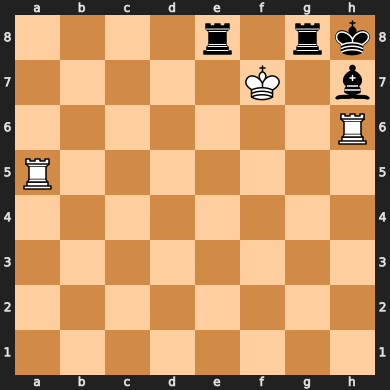

In [7]:
engine1 = Engine('4r1rk/5K1b/7R/R7/8/8/8/8 w - - 0 1')
# '8/4PKPk/5n1p/4b3/8/8/p7/q7 w - - 0 1 e8/Q+ Nxe8 g8/Q#'
engine1.board

In [8]:
# 2551609946390440050689
import chess
engine1.board.push(chess.Move(chess.H6, chess.H7))

In [9]:
engine1.get_hash()

2551609946390440050688

In [10]:
engine1 = Engine('5K1k/7p/8/2p5/2rp4/8/p7/1B4B1 w - - 0 1')
# 4182050160554138861569

In [14]:
engine1.get_hash()

4182050160554138861793

In [13]:
engine1.board.push_uci('h7h5')

Move.from_uci('h7h5')

In [15]:
4182050160554138861569 >> 8

16336133439664604928

In [16]:
4182050160554138861793 >> 8

16336133439664604928

In [17]:
h = 16336133439664604928 << 8

In [18]:
a = 4182050160554138861793

In [19]:
b = 4182050160554138861569

In [20]:
a -= h

In [21]:
b -= h

In [22]:
a, b

(225, 1)

In [3]:
2.4615604877471924/130

0.018935080674978403

In [3]:
engine = Engine('6Bk/R4K2/8/8/8/8/8/8 w - - 0 1')

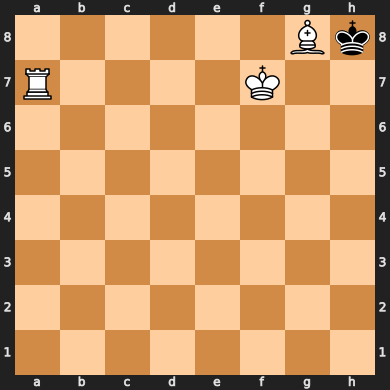

In [4]:
engine.board

In [5]:
from my_chess_engine import storage

In [6]:
storage[engine.hash]

(inf, Move.from_uci('g8h7'))

In [12]:
engine.make_move(storage[engine.hash][1])

KeyError: 2111843814805896167424

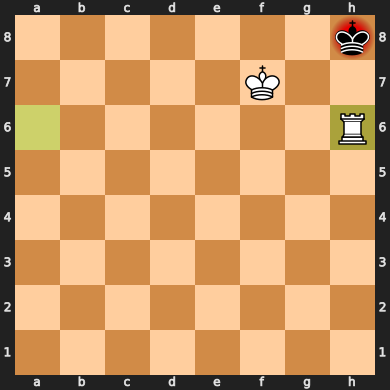

In [13]:
engine.board

In [14]:
engine.board.move_stack

[Move.from_uci('g8h7'),
 Move.from_uci('h8h7'),
 Move.from_uci('a7a6'),
 Move.from_uci('h7h8'),
 Move.from_uci('a6h6')]